In [85]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import importlib
import torch.nn.functional as F

import data
import tools
import plot
importlib.reload(data)
importlib.reload(tools)
importlib.reload(plot)

from tools import *      
from data import *
from plot import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.grid'] = True


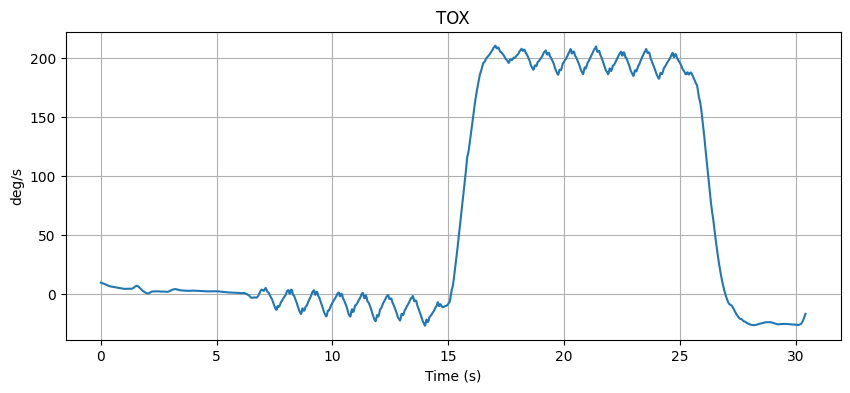

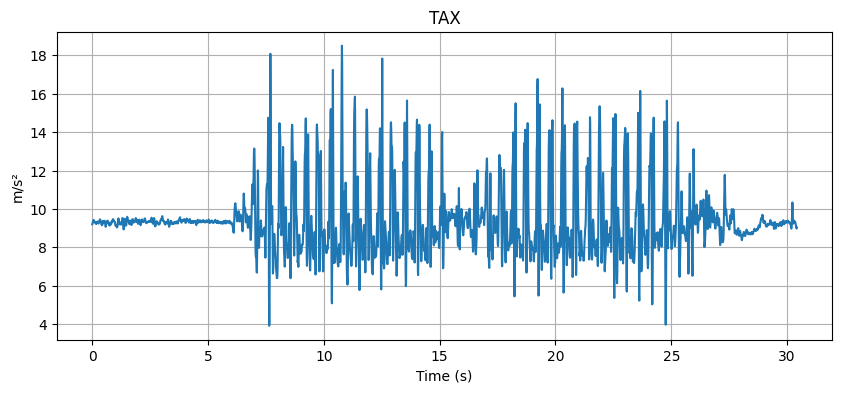

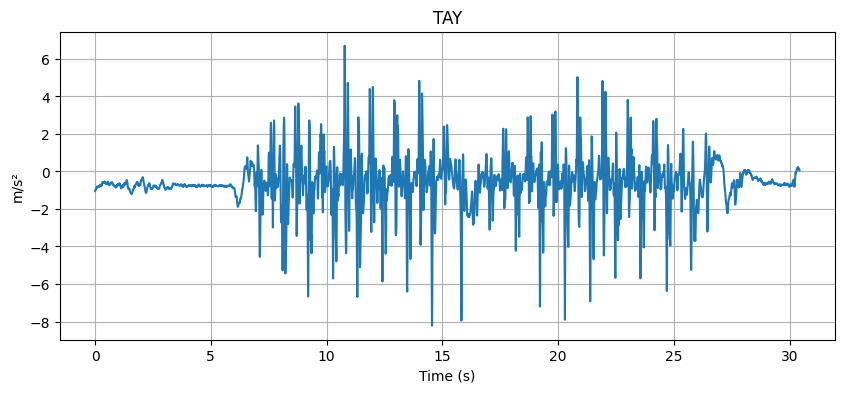

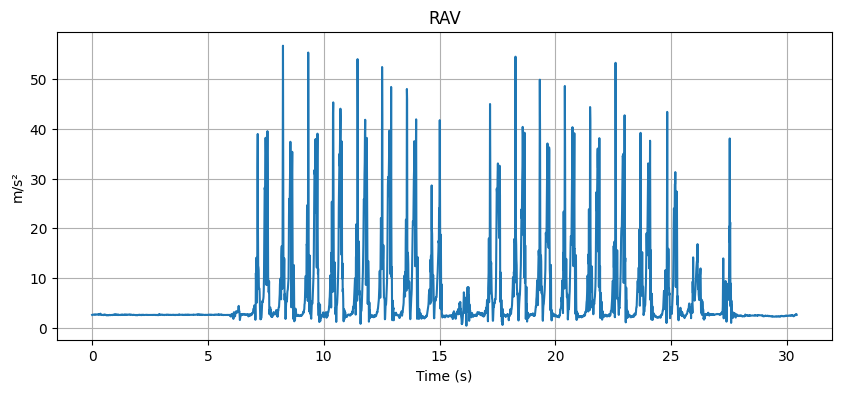

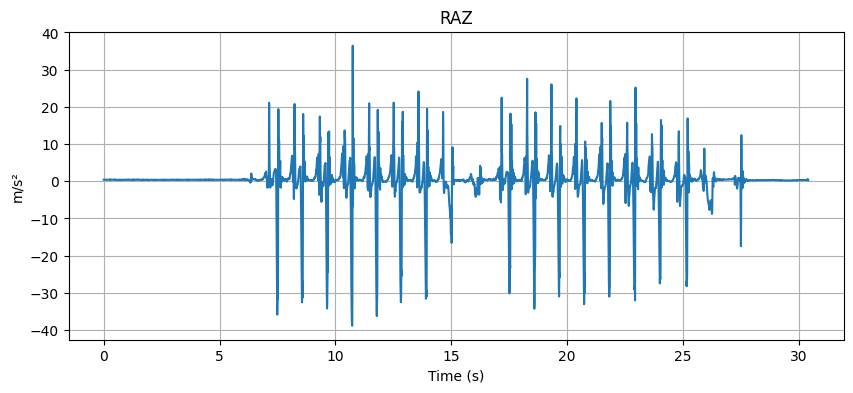

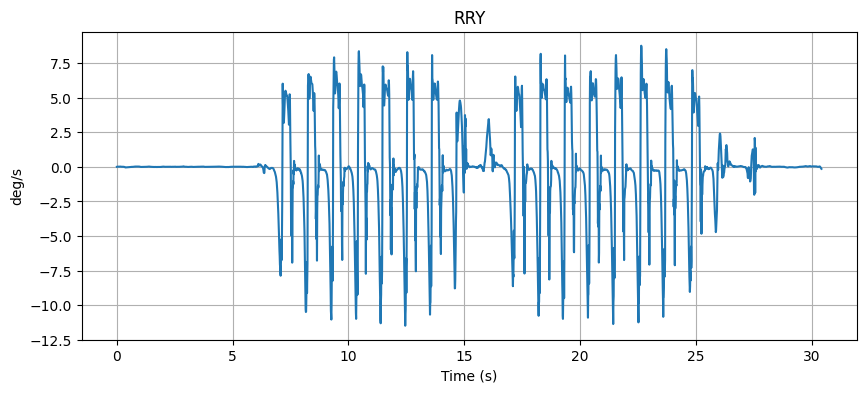

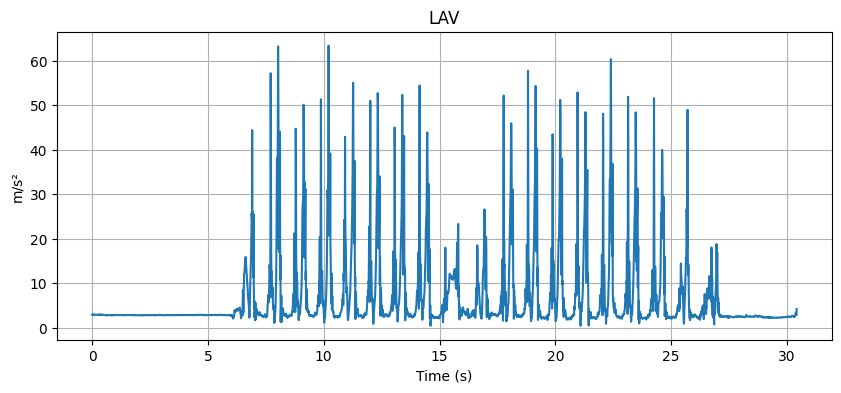

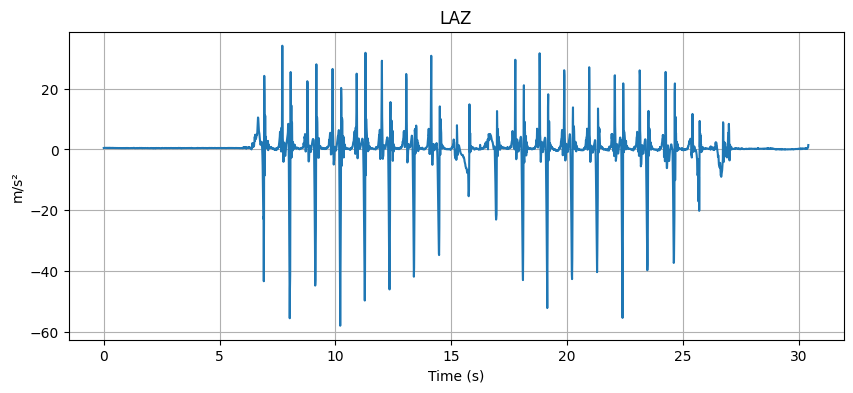

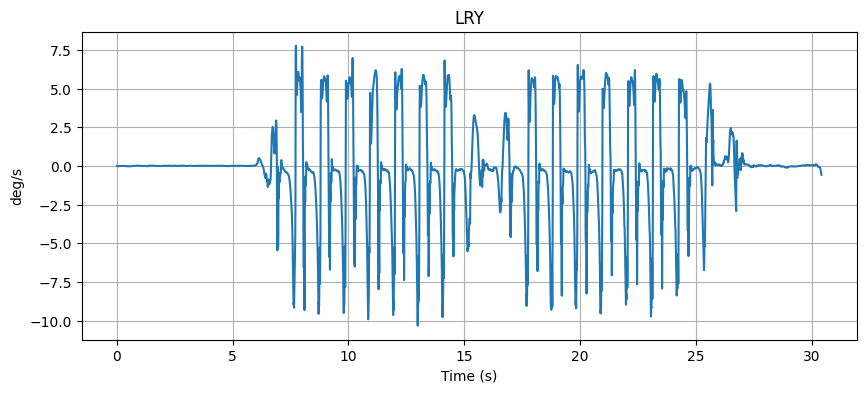

In [86]:
subject = 5
trial = 1
metadata = load_metadata(subject, trial)
signal = load_signal(subject, trial)

to_plot = ['TOX','TAX','TAY','RAV','RAZ','RRY','LAV','LAZ','LRY']
show_plot_simple(signal, to_plot)


In [87]:
subjects = list(range(1, 11))  # 10 subjects
signal_names = ['RAV','RAZ']   # select only two signals
X = build_X(subjects, signal_names, trial=1)

In [88]:
Z,Phi=CDL(X,2)

# Visualisation des résultats

Cette cellule trace :
- les atomes appris (pour chaque canal),
- pour quelques sujets : signal original vs reconstruction et MSE,
- les cartes d'activations (Z) pour quelques sujets,
- les normes des atomes et checks NaN.

Affiche les graphiques inline. Ajuste `n_display` si tu veux plus/moins de sujets.

--- 1) Affichage des atomes (Phi) ---


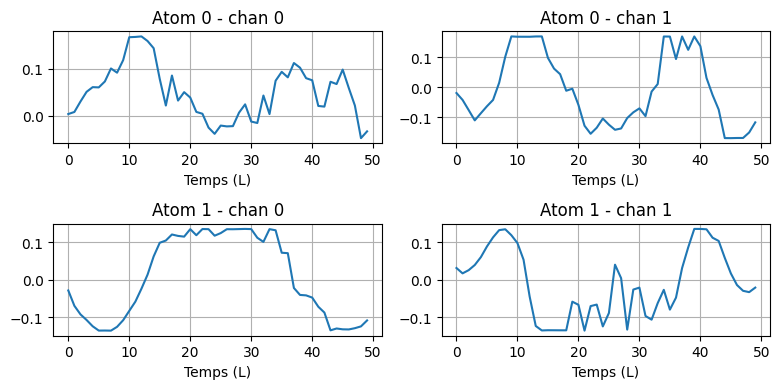


--- 2) Reconstruction et MSE par sujet ---
Subject 0 MSE: 5.424230e-01


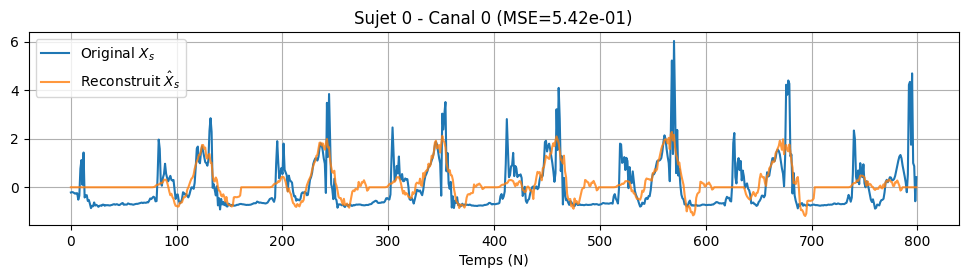

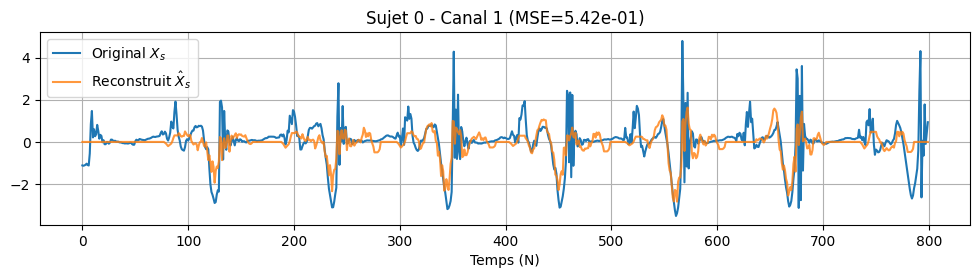


--- 3) Affichage des activations (Z) ---


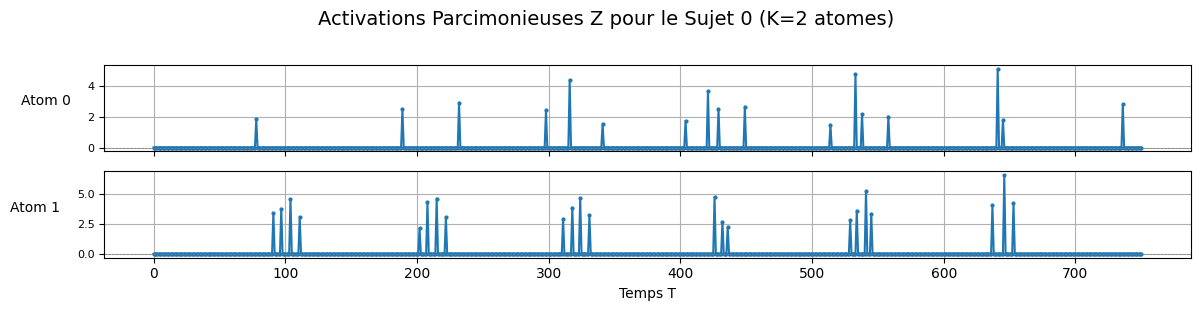


--- 4) Normes des atomes (Phi) ---
Normes L2 des atomes: [0.99999994 1.        ]

--- 5) Statistiques globales de MSE ---
MSE médiane sur 10 sujets: 5.224499e-01
MSE moyenne sur 10 sujets: 5.277742e-01


In [89]:
full_plot_analysis(X,Z,Phi)

In [90]:
subjects = list(range(1, 11))  # 10 subjects
signal_names = ['RAV','RAZ']   # select only two signals
X = build_X(subjects, signal_names, trial=1)

In [91]:
A,Z,Phi = PerCDL(X,2)

--- 1) Affichage des atomes (Phi) ---


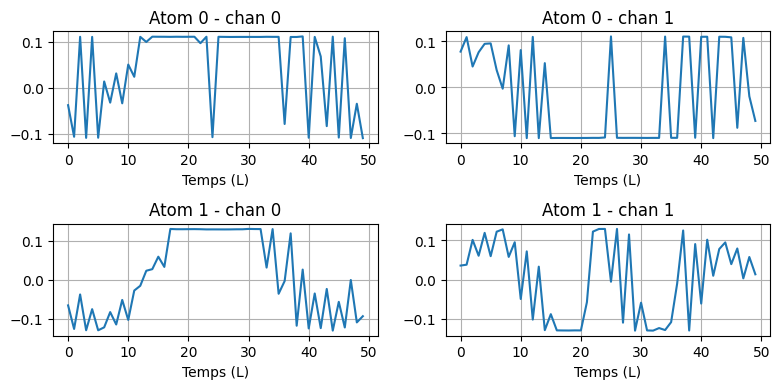


--- 2) Reconstruction et MSE par sujet ---
Subject 0 MSE: 6.570688e-01


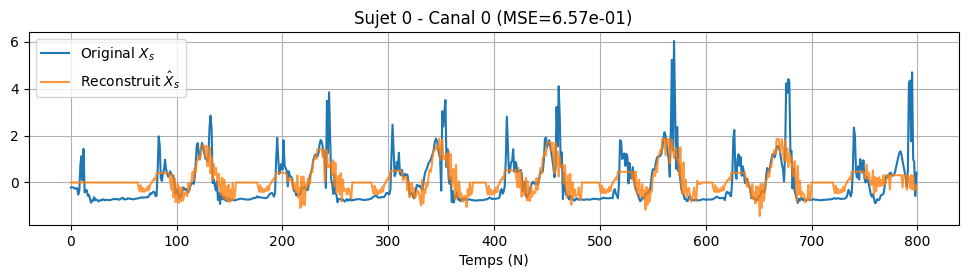

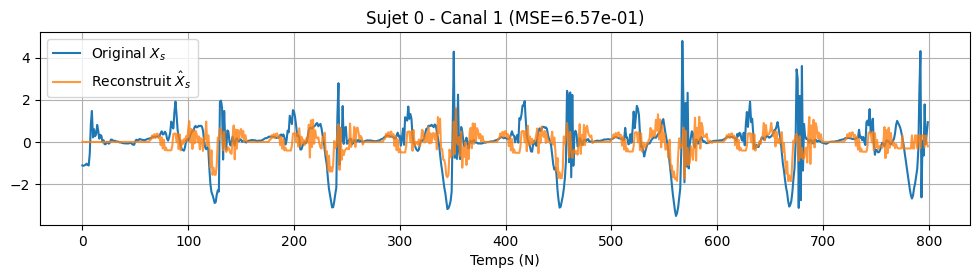


--- 3) Affichage des activations (Z) ---


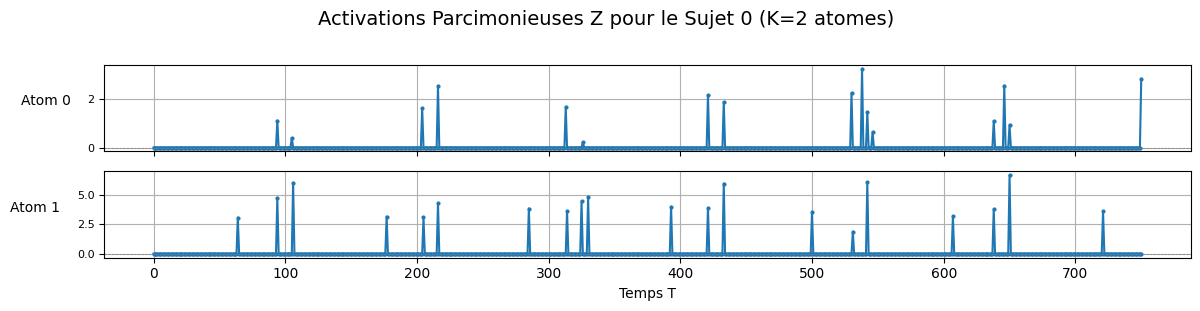


--- 4) Normes des atomes (Phi) ---
Normes L2 des atomes: [0.99999994 0.99999994]

--- 5) Statistiques globales de MSE ---
MSE médiane sur 10 sujets: 6.155740e-01
MSE moyenne sur 10 sujets: 6.254977e-01


In [92]:
full_plot_analysis(X,Z,Phi)


  Analyse Complète Time-Warping - Sujet 0 / 10

--- 3) Métriques de Reconstruction (Sujet 0) ---

📊 MSE par canal (Comparaison):
  Canal 0: Original=5.8739e-01, Warped=5.0693e-01
  Canal 1: Original=7.2675e-01, Warped=5.9354e-01

📈 MSE Globale:
  MSE Globale (Φ original): 6.5707e-01
  MSE Globale (Φ time-warped): 5.5024e-01
  Gain de réduction d'erreur: 16.26 %

--- 1) Visualisation de la Reconstruction (Sujet 0) ---


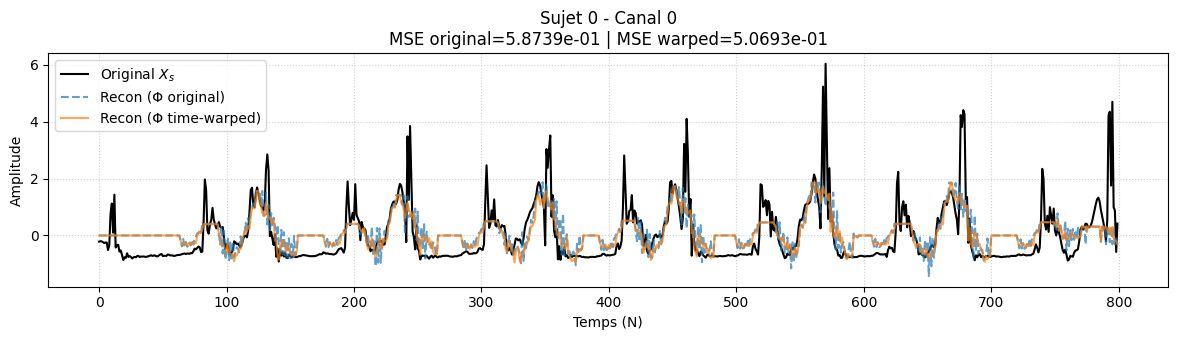

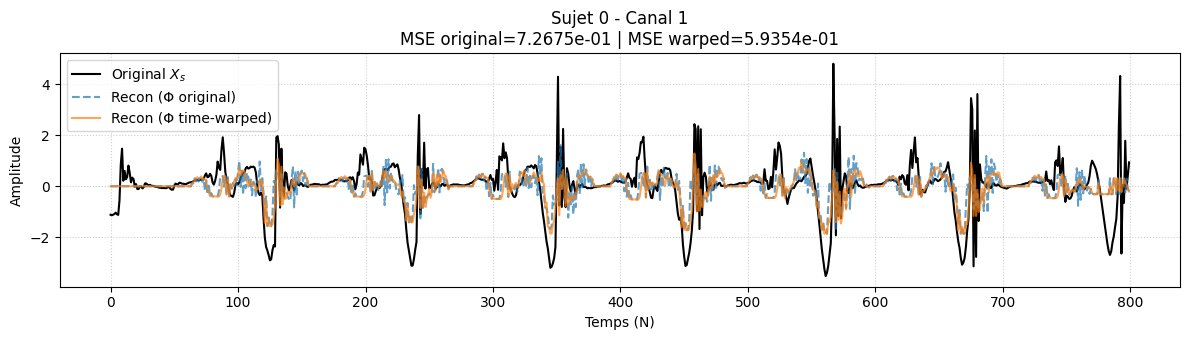


--- 2) Barplot de Comparaison des MSE (Sujet 0) ---


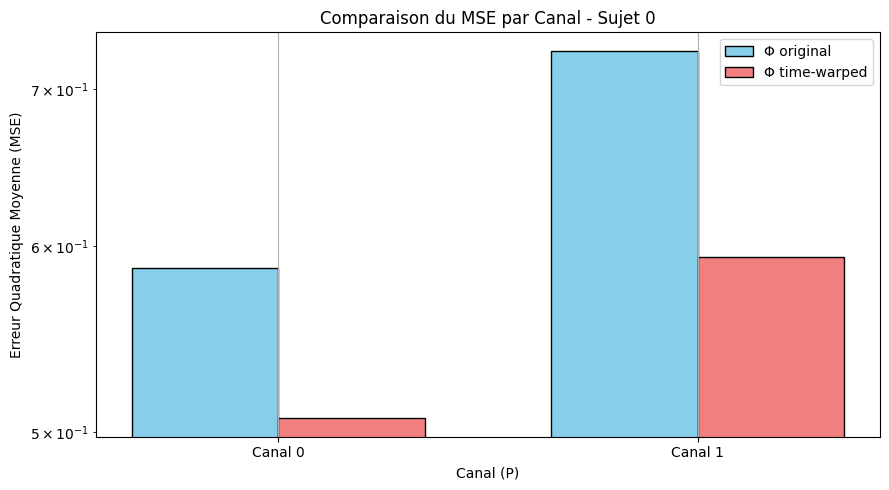

In [94]:
full_warping_analysis(X,Z,Phi,A)